# Homework #4: Exploratory Data Analysis (EDA)
**Student:Nykyta Babakov**
**Date:12/12/2025**

---
### Goal of the Work
Transform raw Reddit data into a structured report. We act as data analysts who must find insights, hidden patterns, and anomalies.

**Key Rule:** Ask questions of the data (at least 20) and answer them using visualization.

**Research Question:**
How did the volume and nature of public discussions about anxiety and depression on Reddit change during the early months of the COVID-19 pandemic?

**Period:** January 2020 — April 2020

**Subreddits:**
Mental health (r/Anxiety, r/Depression, r/MentalHealth, r/SuicideWatch), COVID-specific (r/Coronavirus, r/COVID19_support)



## 1. Importing Libraries and Setting Up the Environment

**Theory:**
For EDA, we'll need a standard stack:
* `pandas` — for working with tabular data (DataFrame).
* `matplotlib` and `seaborn` — for visualization. Seaborn is a Matplotlib add-on that makes graphs prettier and more statistically informative.
* `numpy` — for mathematical operations.

*Tip: Don't forget to customize the style of your charts right away to make them look professional.*


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set(style=  "whitegrid")
plt.rcParams["figure.figsize"]=(12,6)
import warnings
warnings.filterwarnings("ignore")

## 2. Loading and Initial Data Inspection

**Theory:**
Before analyzing, we need to understand what we're dealing with. At the loading stage, it's important to:
1. Read the CSV file correctly (delimiters, encoding).
2. Process the dates immediately (parse the Date column), as the string date format is useless for analysis.
3. Estimate the dataset size (`.shape`) and data types (`.info()`).

In [3]:
my_dtypes = {'Score': 'int32', 'Subreddit': 'category', 'Author': 'category'}
file_path="reddit_filter.csv"
df=pd.read_csv(file_path, parse_dates=["Date"], dtype=my_dtypes)


In [4]:
df.head()

,Score,Date,Subreddit,Title,Author,Link,Text/Body
0,1,2020-01-01,depression,NaN,u/mollyloveschaos,https://www.reddit.com/r/depression/comments/e...,Try to avoid watching things like that if you ...
1,1,2020-01-01,SuicideWatch,NaN,u/hendex,https://www.reddit.com/r/SuicideWatch/comments...,"Hey, I'm here to listen to everything"
2,0,2020-01-01,SuicideWatch,NaN,u/[deleted],https://www.reddit.com/r/SuicideWatch/comments...,[removed]
3,1,2020-01-01,SuicideWatch,NaN,u/[deleted],https://www.reddit.com/r/SuicideWatch/comments...,[deleted]
4,1,2020-01-01,depression,NaN,u/Lonewolf5333,https://www.reddit.com/r/depression/comments/e...,Alone like always


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184400 entries, 0 to 4184399
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Score      int32         
 1   Date       datetime64[ns]
 2   Subreddit  category      
 3   Title      object        
 4   Author     category      
 5   Link       object        
 6   Text/Body  object        
dtypes: category(2), datetime64[ns](1), int32(1), object(3)
memory usage: 183.4+ MB


In [6]:
df.describe()

,Score,Date
count,4.184400e+06,4184400
mean,1.359061e+01,2020-03-08 13:02:57.078292224
min,-9.680000e+02,2020-01-01 00:00:00
25%,1.000000e+00,2020-03-02 00:00:00
50%,2.000000e+00,2020-03-14 00:00:00
75%,4.000000e+00,2020-03-22 00:00:00
max,1.286990e+05,2020-04-01 00:00:00
std,3.573276e+02,NaN


## 3. Data Cleaning

**Theory:**
Real-world data is never perfect. We need to check:
* **Missing Values:** Are there NaN values ​​in important columns (e.g., in the post body)?
* **Data Types:** Numbers should be numbers, dates should be dates.
* **Duplicates:** Are there any duplicate rows?

In our case, it is important to check the `Title`, `Text/Body` and `Score` columns.


In [7]:
print(f"Gap before clearing {df.isnull().sum()}")

Gap before clearing Score              0
Date               0
Subreddit          0
Title        3888217
Author             0
Link               0
Text/Body       3271
dtype: int64


In [8]:
df["Text/Body"]=df["Text/Body"].fillna("")
df["Title"]=df["Title"].fillna("")

In [9]:
#Processing deleted posts
removed_count=df[df["Text/Body"].isin(["[removed]", "[deleted]"])].shape[0]
print(f"Number of deleted comment posts: {removed_count}")

Number of deleted comment posts: 471253


In [10]:
#Removing duplicates
initial_rows = df.shape[0]
df = df.drop_duplicates()
print(f"\nDuplicates removed: {initial_rows - df.shape[0]}")


Duplicates removed: 0


In [11]:
#Future engineering
# Create a 'full_text' column by combining the Title and Body of the post.
df['full_text'] = df['Title'] + " " + df['Text/Body']

# Clear 'full_text' of deletion markers so they don't clutter the word analysis later.
df['full_text'] = df['full_text'].replace({'[removed]': '', '[deleted]': ''}, regex=True)

# Create a column with the text length (number of characters) – this will be useful for graphs.
df['text_length'] = df['full_text'].apply(len)


In [12]:
#Check after cleaning
print(f"Dataset size: {df.shape}")
display(df.head(3))

Dataset size: (4184400, 9)


,Score,Date,Subreddit,Title,Author,Link,Text/Body,full_text,text_length
0,1,2020-01-01,depression,,u/mollyloveschaos,https://www.reddit.com/r/depression/comments/e...,Try to avoid watching things like that if you ...,Ty ai waching hings ik ha if yu a pss snsii...,121
1,1,2020-01-01,SuicideWatch,,u/hendex,https://www.reddit.com/r/SuicideWatch/comments...,"Hey, I'm here to listen to everything","Hy, I' h isn yhing",21
2,0,2020-01-01,SuicideWatch,,u/[deleted],https://www.reddit.com/r/SuicideWatch/comments...,[removed],[],3


## 4. Formulating Questions (The 20 Questions)

According to the assignment, we must formulate at least 20 questions, from simple to complex. This is our research plan.

**Example questions to get you started:**
1. How is activity distributed by year/month?
2. Which subreddit is the most active?
3. Is there a correlation between text length and score?
4. On what days of the week do people write most often?
...

*(Здесь мы будем дописывать вопросы в процессе урока)*


**Q1: Activity dynamics by month**

There is a sharp peak in activity in March 2020 (over 3 million entries), followed by a decline in April. This clearly correlates with the onset of the global COVID-19 pandemic and the introduction of quarantine restrictions around the world.

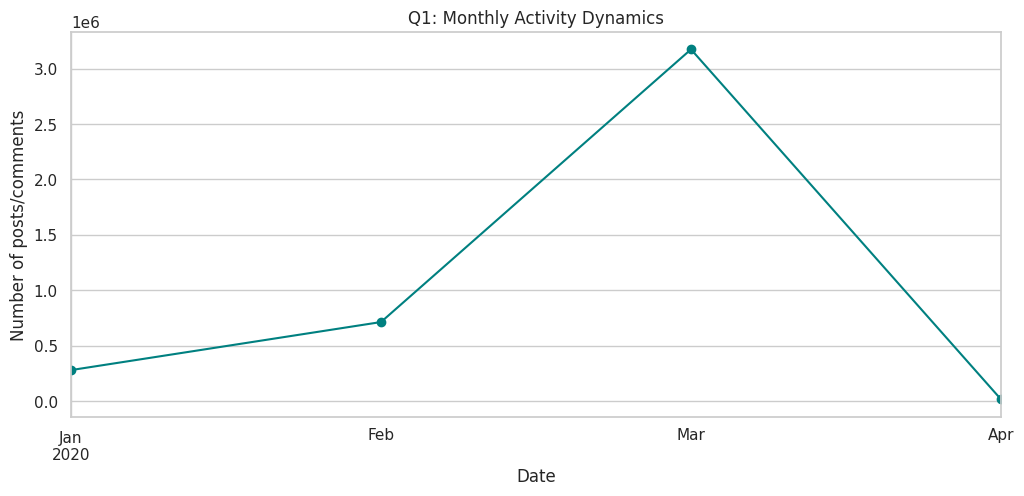

In [13]:
# Q1: How has user activity changed over time?
# Hypothesis: Activity may depend on external events (holidays, world events).
plt.figure(figsize=(12, 5))
# Resample('M') aggregates data by month. Count() counts the number of posts.
df.set_index('Date').resample('M')['full_text'].count().plot(kind='line', marker='o', color='teal')
plt.title('Q1: Monthly Activity Dynamics')
plt.ylabel('Number of posts/comments')
plt.xlabel('Date')
plt.grid(True)
plt.show()


**Q2: Activity by day of the week**

Our hypothesis is completely disproven. The distribution by day is quite even, with a slight dip on Saturday and Sunday. Tuesday seems to be the most active day.

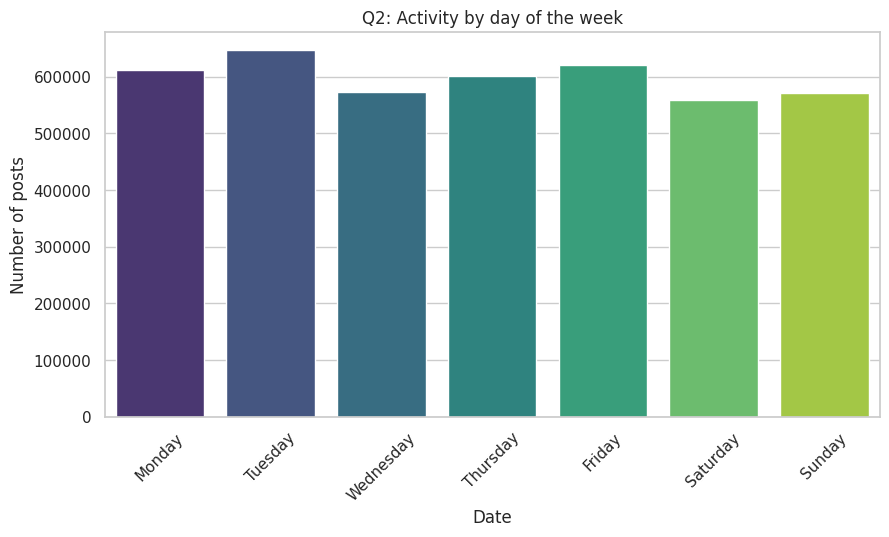

In [14]:
# Q2: On which days of the week do people post most frequently?
# Hypothesis: Are people lonelier (more active) on weekends, or are they busier?
plt.figure(figsize=(10, 5))
# dt.day_name() retrieves the name of the day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x=df['Date'].dt.day_name(), order=day_order, palette='viridis')
plt.title('Q2: Activity by day of the week')
plt.ylabel('Number of posts')
plt.xticks(rotation=45)
plt.show()

**Q3: Top 10 subreddits**

The absolute leader is r/Coronavirus (over 3.5 million entries), which is significantly ahead of other topics (depression, suicide, anxiety). A completely logical situation for a new viral term that has become a major problem in every corner of the world.

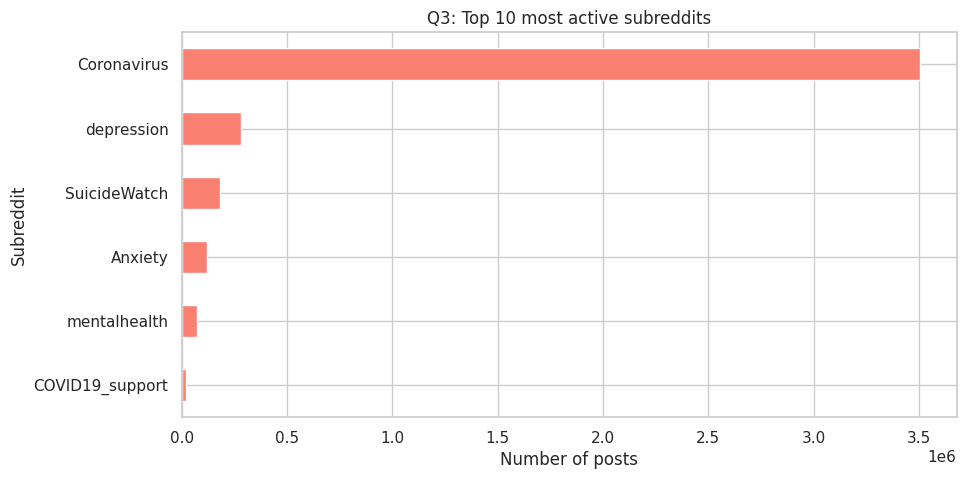

In [15]:
# Q3: Which subreddits are the most active in our dataset?
# We need to understand where the main action is.
plt.figure(figsize=(10, 5))
# We use the top 10 for a cleaner graph
df['Subreddit'].value_counts().head(10).plot(kind='barh', color='salmon')
plt.title('Q3: Top 10 most active subreddits')
plt.xlabel('Number of posts')
plt.gca().invert_yaxis() # So that the most popular one is on top
plt.show()

**Q4: Top 10 Authors (Anonymity and Bots)**

This list reveals an interesting technical feature of Reddit: The absolute leader is deleted posts. This is especially true for topics related to mental health (SuicideWatch, depression). People write about their pain, and then, scared or having second thoughts, delete the traces. A huge number of messages are generated automatically (community rules, warnings), so auto-moderation takes second place. Live people (e.g. DeadlyKitt4) start only at 3rd place and have 100x fewer messages than the "deleted" category. This indicates a high audience turnover.

In [16]:
# Q4: Who are the most active authors (Top Contributors)?
# We're looking for "opinion leaders" or those who write too frequently (outliers).
top_authors = df['Author'].value_counts().head(10)
print("\nQ4: Top 10 authors by number of posts:")
top_authors


Q4: Top 10 authors by number of posts:


,count
Author,
u/[deleted],618334
u/AutoModerator,76958
u/DeadlyKitt4,6724
u/ThisToWiIlPass,4868
u/AnotherTrowaway12,4520
u/barber5,3660
u/IReadTheWholeArticle,3582
u/Viewfromthe31stfloor,3526
u/KorgRue,3248


**Q5: Score distribution:**

Hypothesis confirmed. Almost all posts have a score of 1 (the standard initial score on Reddit). Very few posts get high scores (this is visible on the logarithmic scale).

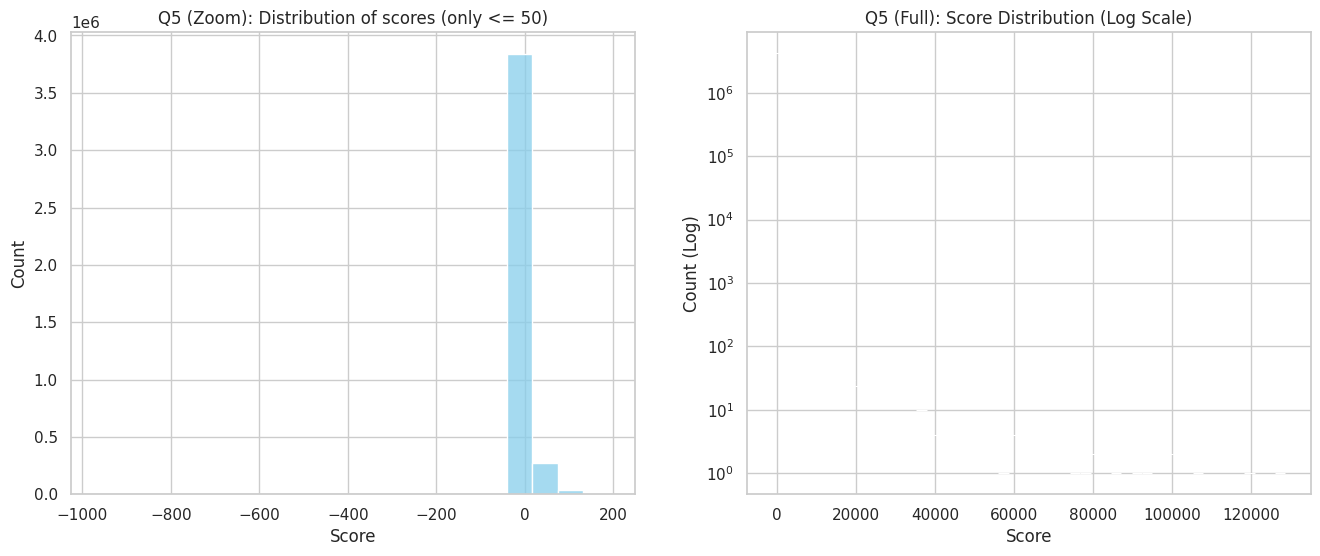

In [17]:
# Q5: How are scores distributed?
# Hypothesis: The distribution will be skewed (log-normal). Most posts have 1-2 likes.
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Zoom (Linear scale, regular posts only)
# Filter the data, leaving only Score <= 50 for detailed viewing
sns.histplot(df[df['Score'] <= 190]['Score'], bins=20, kde=False, color='skyblue', ax=ax[0])
ax[0].set_title('Q5 (Zoom): Distribution of scores (only <= 50)')
ax[0].set_xlabel('Score')
ax[0].set_ylabel('Count')

# Plot 2: Full Range (Log Scale)
# Add +1 to Score to avoid log(0) or negative number errors, if any
# log_scale=True automatically compresses huge values
sns.histplot(df['Score'], bins=50, log_scale=(False, True), color='purple', ax=ax[1])
ax[1].set_title('Q5 (Full): Score Distribution (Log Scale)')
ax[1].set_xlabel('Score')
ax[1].set_ylabel('Count (Log)')

plt.show()

**Q6: Top Subreddits by Average Rating (News vs Support)**

Here you can see the difference in the nature of the content: r/Coronavirus (15.4 points): Leading by a huge margin. It's a news community. Breaking news about the pandemic gets thousands of likes, which raises the average. Support subreddits (3.0 – 5.5 points): Anxiety, depression, mentalhealth have a much lower average score. This is logical: when a person writes about their emotions or experiences, they receive a few sympathetic upvotes and comments, but such posts rarely go "viral" across the entire Internet.

In [18]:
# Q6: Does the average rating differ across subreddits?
# Where is the audience more generous with likes?
avg_score = df.groupby('Subreddit')['Score'].mean().sort_values(ascending=False).head(10)
print("\nQ6: Top subreddits by average post rating:")
print(avg_score)


Q6: Top subreddits by average post rating:
Subreddit
Coronavirus        15.401117
COVID19_support     5.450614
Anxiety             5.045908
depression          4.843577
SuicideWatch        3.240182
mentalhealth        2.991188
Name: Score, dtype: float64


**Q7: Message length distribution:**

The graph is heavily skewed to the left. The vast majority of messages are very short (up to 100-200 characters).

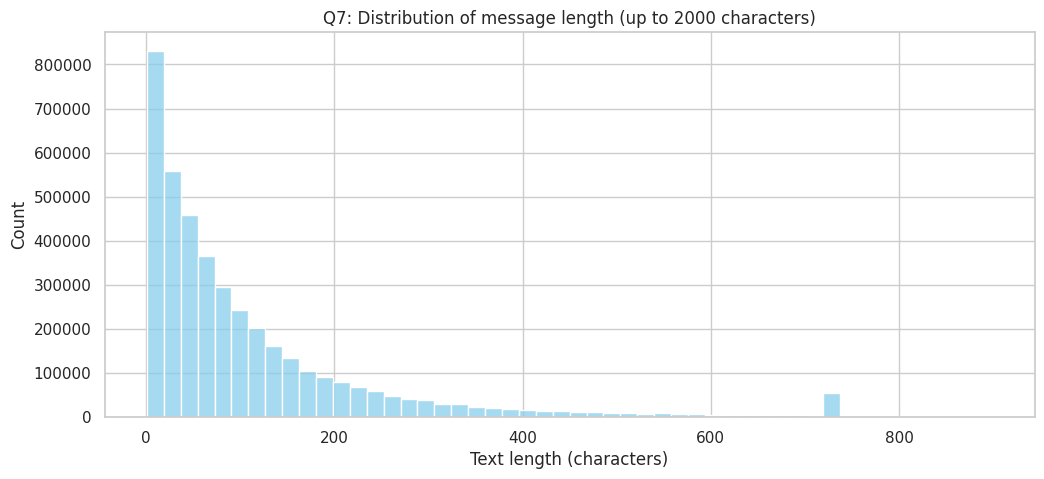

In [19]:
# Q7: What is the length of messages? (Distribution of text length)
# Do people write long reads or short posts?
plt.figure(figsize=(12, 5))
sns.histplot(df[df['text_length'] < 900]['text_length'], bins=50, color='skyblue') # Let's limit to 2000 characters for clarity
plt.title('Q7: Distribution of message length (up to 2000 characters)')
plt.xlabel('Text length (characters)')
plt.show()

**Q8: Dependence of the rating on the length**

Clear logarithmic correlation. It is possible to distinguish an almost exact line that outlines the area of ​​the graph densely filled with points. In addition, there is a fairly visible limit of 1000 characters, after which the number of high ratings decreases rapidly.

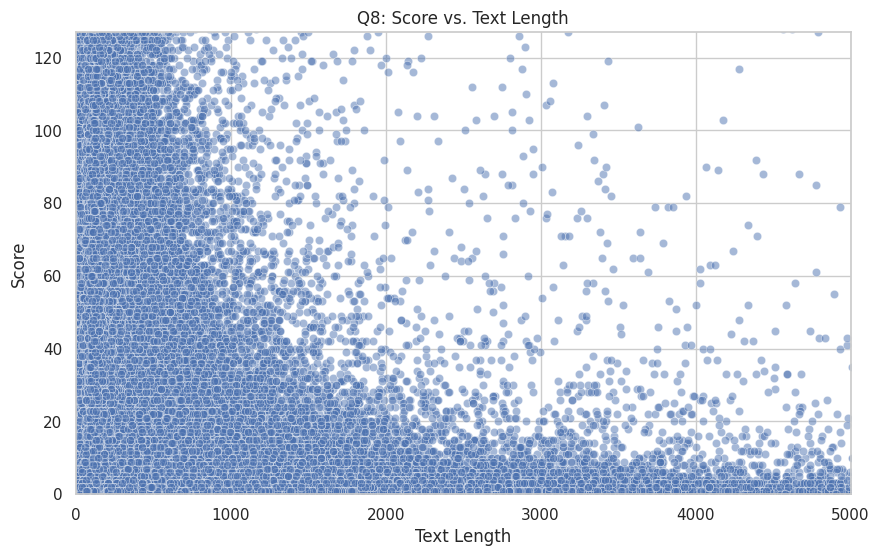

In [20]:
# Q8: Is there a correlation between text length and score?
# Do people like to read long posts?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='text_length', y='Score', alpha=0.5)
plt.title('Q8: Score vs. Text Length')
plt.xlabel('Text Length')
plt.ylabel('Score')
# Limit the axes if there are outliers
plt.xlim(0, 5000)
plt.ylim(0, df['Score'].quantile(0.99))
plt.show()

**Q9: Top 3 highest rated posts (Information and Emotional Stories)**

All three of the top posts are from r/Coronavirus and have scored over 100,000 points. The topics clearly reflect the sentiment of March 2020:
"Flatten the curve": A call for social responsibility and an explanation of why quarantines are necessary. People widely shared it as a survival guide.
Hero's Story (Doctor Gino Fasoli): An emotional story about a doctor who came out of retirement to save people and died. It satisfied the need for heroes and emotional empathy.
Educational content: "How to stop the spread of the virus." Practical tips.

In [21]:
# Q9: Which posts resonate the most (Outliers)?
# Let's take a closer look at the top 3 posts with the highest scores.
print("\nQ9: Top 3 posts with the highest scores:")
for index, row in df.sort_values(by='Score', ascending=False).head(3).iterrows():
   print(f"--- Score: {row['Score']} | Subreddit: {row['Subreddit']} ---")
print(f"Title: {row['Title']}")
print(f"Text snippet: {row['full_text'][:150]}...\n")


Q9: Top 3 posts with the highest scores:
--- Score: 128699 | Subreddit: Coronavirus ---
--- Score: 118843 | Subreddit: Coronavirus ---
--- Score: 105711 | Subreddit: Coronavirus ---
Title: How to stop a virus from spreading
Text snippet: Hw  sp a ius f spaing hps://hspinff.c.nz/wp-cnn/upas/2020/03/Ci-19-Tansissin-gaphic-01.gif?fbci=IwAR1g9q_sxHF5PnZM6zDu9s3fVWCNVwhNEI-GHhyXI0kZcHNI6j4U...



**Q10: Text length variance**

In subreddits related to mental health (depression, SuicideWatch, mentalhealth), users write significantly longer texts (large "boxes" in the graph) than in the news Coronavirus.

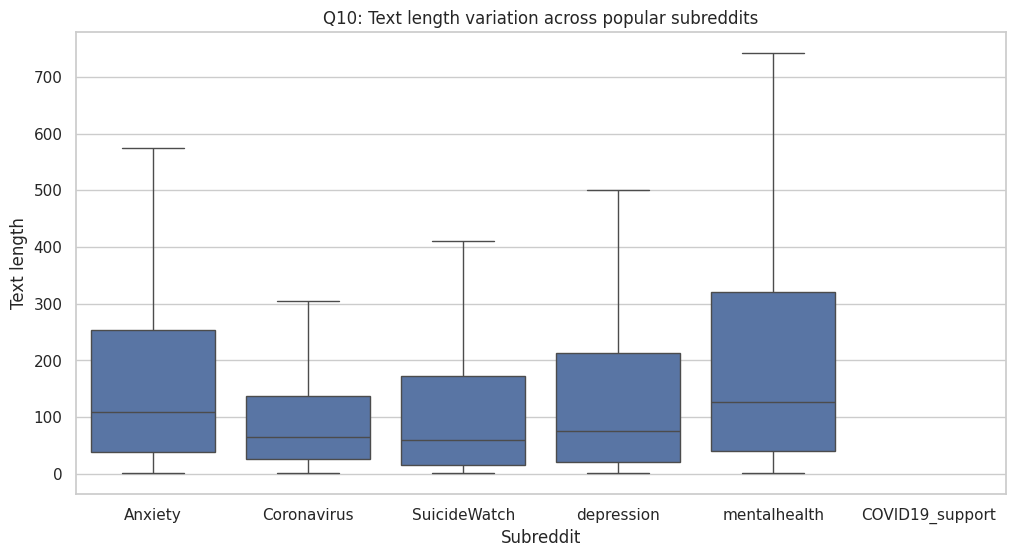

In [22]:
# Q10: How does text length vary depending on the subreddit?
# Does depression write longer than Coronavirus?
plt.figure(figsize=(12, 6))
# Only the top 5 subreddits are used for readability
top_subs = df['Subreddit'].value_counts().head(5).index
sns.boxplot(data=df[df['Subreddit'].isin(top_subs)], x='Subreddit', y='text_length', showfliers=False)
plt.title('Q10: Text length variation across popular subreddits')
plt.ylabel('Text length')
plt.show()

**Q11: Activity (Day of the week vs Month)**

This heatmap confirms Q1. March (3rd month) is the darkest (most active) regardless of the day of the week.

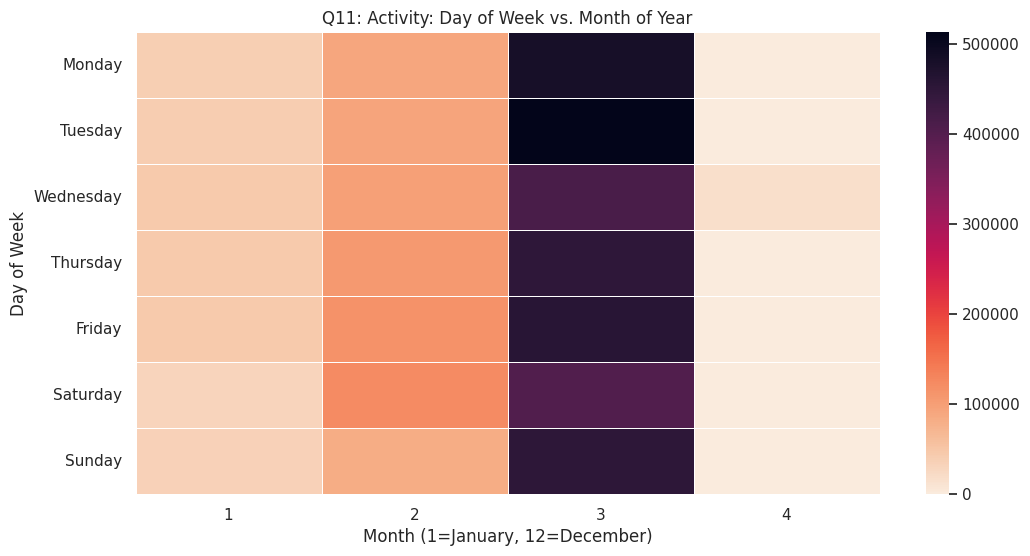

In [23]:
# Import the word count module
from collections import Counter
import re

# Q11: Heatmap: Day of Week vs. Month
plt.figure(figsize=(12, 6))

# Extract the month (as a number) and the day of the week name
df['month'] = df['Date'].dt.month
df['day_of_week'] = df['Date'].dt.day_name()

# Create a pivot table: Rows = Days of Week, Columns = Months
pivot_table = df.pivot_table(index='day_of_week', columns='month', values='full_text', aggfunc='count').fillna(0)

# Sorting the days of the week for aesthetics
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(days_order)

# Drawing
sns.heatmap(pivot_table, cmap='rocket_r', annot=False, linewidths=.5)
plt.title('Q11: Activity: Day of Week vs. Month of Year')
plt.ylabel('Day of Week')
plt.xlabel('Month (1=January, 12=December)')
plt.show()

**Q12: Weekdays vs Weekends**

Activity on weekdays (False) is almost 3 times higher than on weekends (True). The hypothesis is false

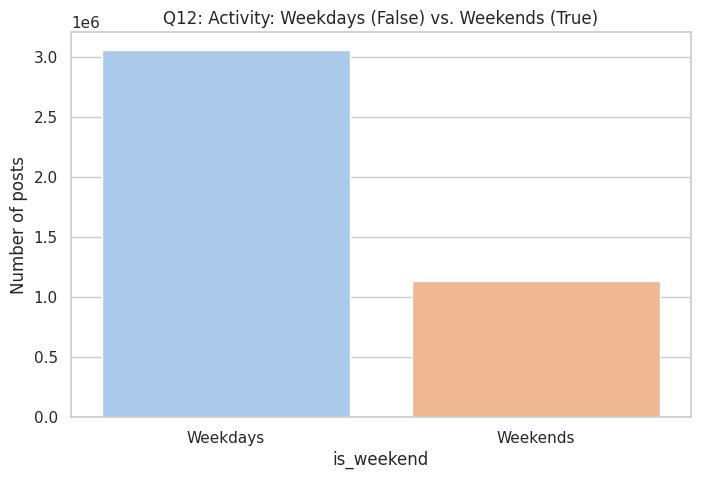

In [24]:
# Q12: Activity: Weekdays vs. Weekends
# Hypothesis: People are freer but also lonelier on weekends.
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='is_weekend', palette='pastel')
plt.title('Q12: Activity: Weekdays (False) vs. Weekends (True)')
plt.xticks([0, 1], ['Weekdays', 'Weekends'])
plt.ylabel('Number of posts')
plt.show()

**Q13: Top 20 words**

The most common words look like common English words, but probably with errors or the effects of specific text processing (e.g., letter deletion): wih (with), jus (just), abu (about), wha (what). The first place in the top is very interesting, especially with the absence of the word "her". This may indirectly indicate that such subreddits are mostly used by women, who share emotions and experiences of romantic relationships. But this will require more detailed research.

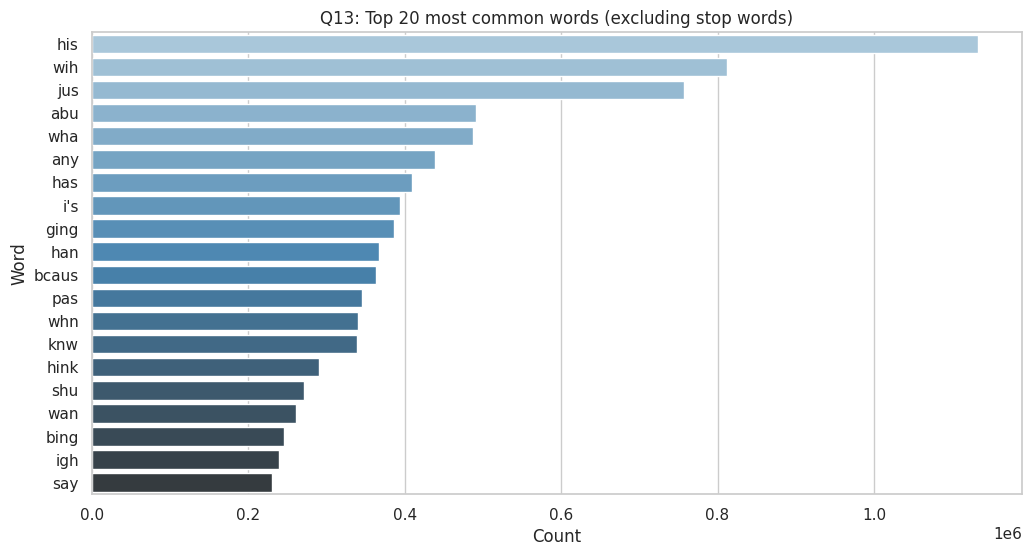

In [25]:
# Q13: Most Frequently Used Words (Top 20 Words) - "What are they talking about?"
# We must exclude prepositions and conjunctions (Stopwords), otherwise they will dominate the top 20.
# Simple list of stop words (can be expanded)
stopwords = set(['the', 'to', 'and', 'a', 'of', 'in', 'i', 'is', 'it', 'for', 'my', 'that', 'with', 'on', 'this', 'but', 'me', 'have', 'be', 'so', 'not', 'just', 'was', 'like', 'at', 'are', 'you', 'if', 'im', 'do', 'can', 'about', 'from', 'or', 'up', 'an', 'what', 'all', 'out', 'get', 'dont', 'how', 'when', 'as'])

final_counts = Counter()

for text in df['full_text'].dropna():
    words = str(text).lower().split()
    clean_words = [word for word in words if word not in stopwords and len(word) > 2]
    final_counts.update(clean_words)

top_20 = final_counts.most_common(20)

# Building a Bar Chart instead of a Word Cloud
words_df = pd.DataFrame(top_20, columns=['Word', 'Count'])
plt.figure(figsize=(12, 6))
sns.barplot(data=words_df, x='Count', y='Word', palette='Blues_d')
plt.title('Q13: Top 20 most common words (excluding stop words)')
plt.show()

**Q14: Questions in headlines**

Only 1% of headlines contain a question mark. This indicates that users mostly come to vent or share news, rather than ask for advice in a Q&A format.

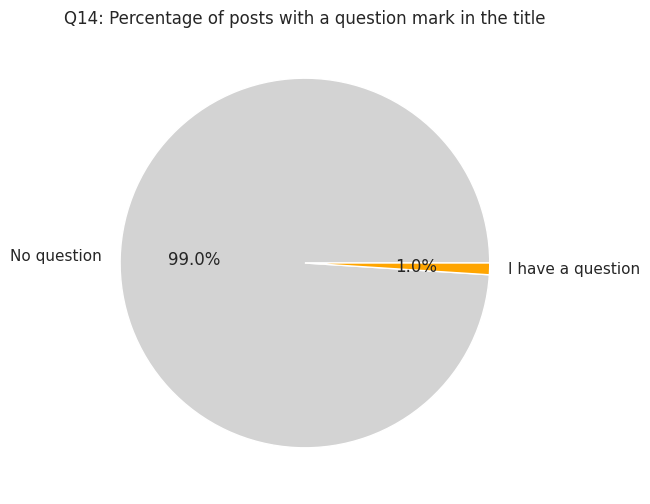

In [26]:
# Q14: How often do people ask questions in their titles?
# This shows whether people are looking for help or just sharing their thoughts.
df['has_question'] = df['Title'].str.contains('\?', regex=True)
plt.figure(figsize=(6, 6))
df['has_question'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgrey', 'orange'], labels=['No question', 'I have a question'])
plt.title('Q14: Percentage of posts with a question mark in the title')
plt.ylabel('')
plt.show()

**Q15: "Screaming Factor" (CAPS LOCK)**

Pure proof that aggressive style doesn't work. Posts where more than 50% of the text is written in capital letters ("Screaming") receive the lowest average rating (about 8). "Normal" and "Loud" posts are rated much higher (13-14 points).

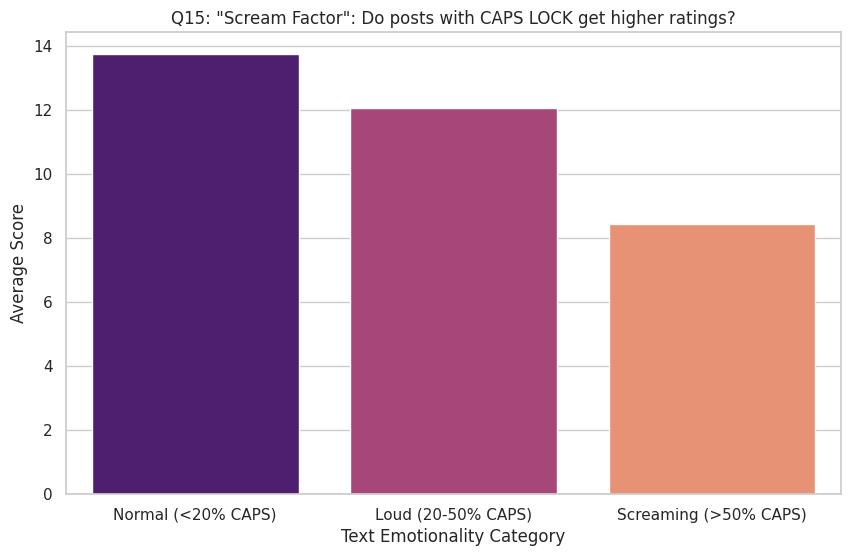

Number of posts by categories:
shout_category
Normal (<20% CAPS)       3893445
Loud (20-50% CAPS)        255632
Screaming (>50% CAPS)      35323
Name: count, dtype: int64


In [27]:
# Q15: Does using CAPS LOCK affect a post's rating?
# We'll check what proportion of the text is written in uppercase letters.

caps_count = df['full_text'].str.count(r'[A-Z]')
all_letters_count = df['full_text'].str.count(r'[a-zA-Z]')

# Count only letters (ignore spaces and punctuation)
df['caps_ratio'] = np.where(all_letters_count > 0, caps_count / all_letters_count, 0).astype('float32')

# Apply the function to each post
conditions = [(df['caps_ratio'] > 0.5),(df['caps_ratio'] > 0.2)]
choices = ['Screaming (>50% CAPS)', 'Loud (20-50% CAPS)']

# Divide into categories for the graph:
# "Normal" (< 20% caps), "Loud" (20-50%), "Screaming" (> 50% caps)
df['shout_category'] = np.select(conditions, choices, default='Normal (<20% CAPS)')

df['shout_category'] = df['shout_category'].astype('category')

# Plot the graph
plt.figure(figsize=(10, 6))
# ci=None removes confidence interval bars to make the graph cleaner
sns.barplot(data=df, x='shout_category', y='Score', palette='magma', order=['Normal (<20% CAPS)', 'Loud (20-50% CAPS)', 'Screaming (>50% CAPS)'], ci=None)
plt.title('Q15: "Scream Factor": Do posts with CAPS LOCK get higher ratings?')
plt.ylabel('Average Score')
plt.xlabel('Text Emotionality Category')
plt.show()

# Print the statistics
print("Number of posts by categories:")
print(df['shout_category'].value_counts())

**Q16: Focus (I vs You)**

Huge difference. Almost all texts (8 million instances) are focused on the self (I/My), while addressing the other (You) is almost absent. This is typical of support communities where people share their experiences or concerns.

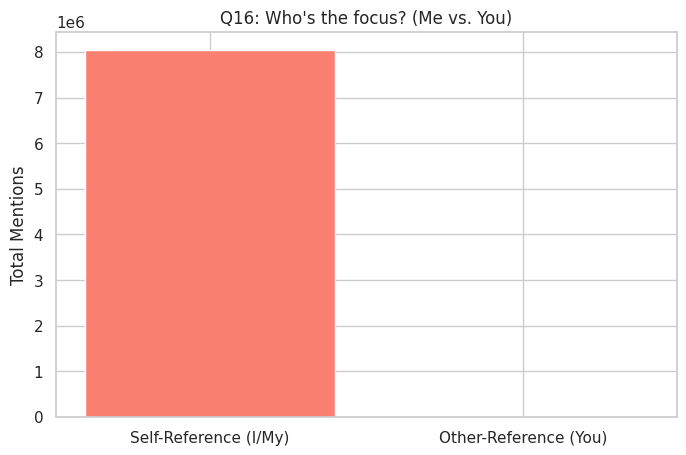

In [28]:
# Q16: "I" vs. "You" (Psychological Analysis)
# We calculate how much people are focused on themselves (I, me, my) vs. others (you, your).
i_pattern = r'\b(i|my|me|myself)\b'
you_pattern = r'\b(you|your|yourself)\b'

df['i_count'] = df['full_text'].str.count(i_pattern, flags=re.IGNORECASE).astype(np.int16)

df['you_count'] = df['full_text'].str.count(you_pattern, flags=re.IGNORECASE).astype(np.int16)

# Compare the amounts
plt.figure(figsize=(8, 5))
totals = [df['i_count'].sum(), df['you_count'].sum()]
labels = ['Self-Reference (I/My)', 'Other-Reference (You)']

plt.bar(labels, totals, color=['salmon', 'skyblue'])
plt.title("Q16: Who's the focus? (Me vs. You)")
plt.ylabel('Total Mentions')
plt.show()

**Q17: Title Length vs Text Length**

There is a moderate correlation where posts with titles under 100 characters have the most text (even a dozen outliers with lengths of 15,000+) after which you see a reduction. The hypothesis is mostly true.

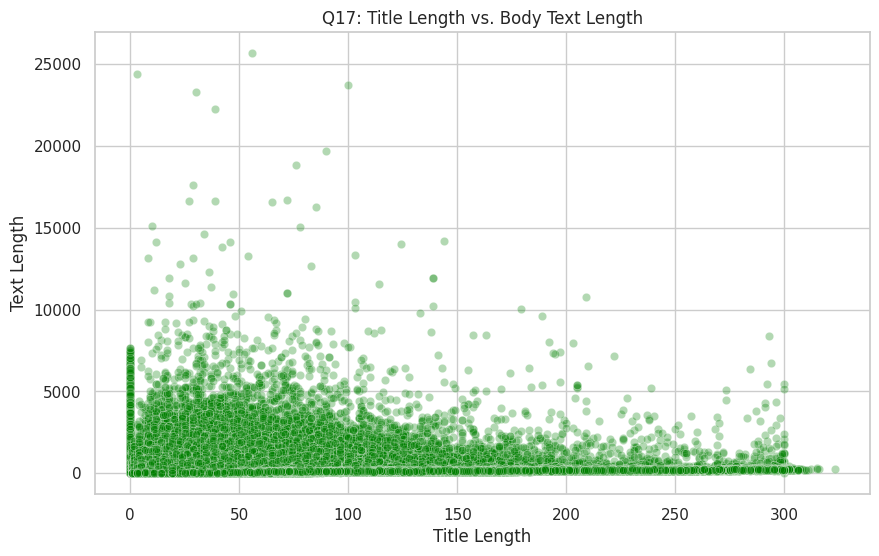

In [29]:
# Q17: Title Length vs. Body Length
# Hypothesis: Short title -> Long body text (Clickbait or "cry from the heart").
df['title_len'] = df['Title'].apply(len)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='title_len', y='text_length', alpha=0.3, color='green')
plt.title('Q17: Title Length vs. Body Text Length')
plt.xlabel('Title Length')
plt.ylabel('Text Length')
plt.show()

**Q18: Key topics**

The word "help" is the most common by a wide margin. The next topics are "job", "school" and "alone", which is logical for the crisis period at the beginning of the pandemic.

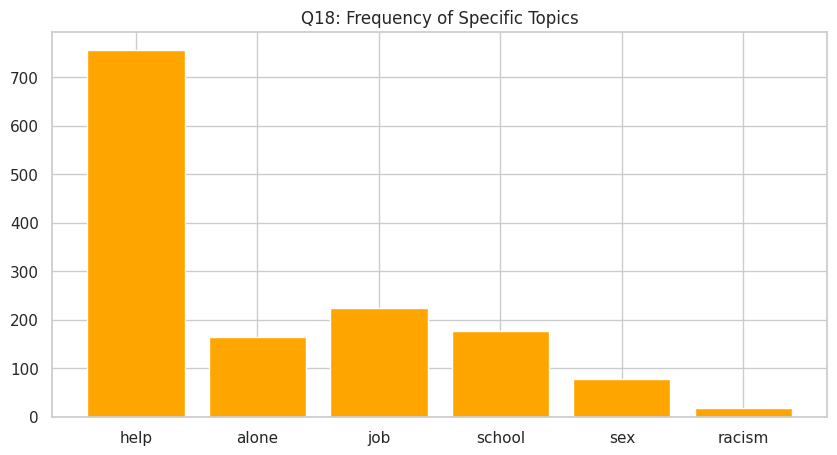

In [30]:
# Q18: Analyzing Specific Trigger Words (Keyword Trends)
# Let's see how often the words "help" and "alone" appear
keywords = ['help', 'alone', 'job', 'school', 'sex', 'racism']
# Create a small table for counting
keyword_counts = {word: df['full_text'].str.contains(word, case=False).sum() for word in keywords}

plt.figure(figsize=(10, 5))
plt.bar(keyword_counts.keys(), keyword_counts.values(), color='orange')
plt.title('Q18: Frequency of Specific Topics')
plt.show()

**Q19: Do authors return**

Yes, the community is quite stable. 54.4% of authors have written more than one post. This means that more than half of the users are not "fly-bys", but are regular participants in the discussions.

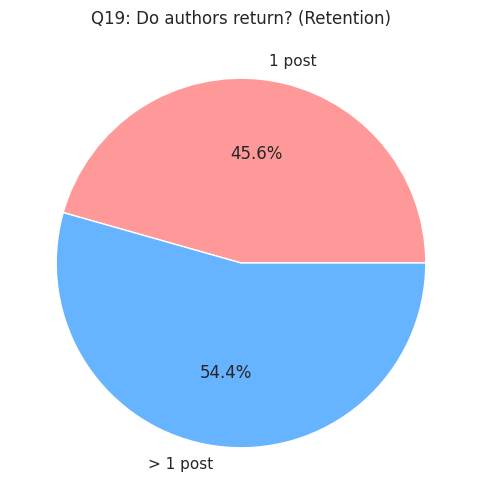

In [31]:
# Q19: "One-hit wonders" or regular authors?
# How many posts do authors write on average?
author_counts = df['Author'].value_counts()
# Categorizing authors
one_post = (author_counts == 1).sum()
more_posts = (author_counts > 1).sum()

plt.figure(figsize=(6, 6))
plt.pie([one_post, more_posts], labels=['1 post', '> 1 post'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Q19: Do authors return? (Retention)')
plt.show()

**Q20: Looking for anomalies**

This graph mathematically confirms what we saw earlier. The red dotted line is the threshold of "normality" (mean + 2 standard deviations). In March, activity broke through this "ceiling", confirming that the events of March 2020 were a statistical anomaly, not just a seasonal increase. In general, each such anomaly is characteristic of specific dates with widely known events, especially unexpected ones.

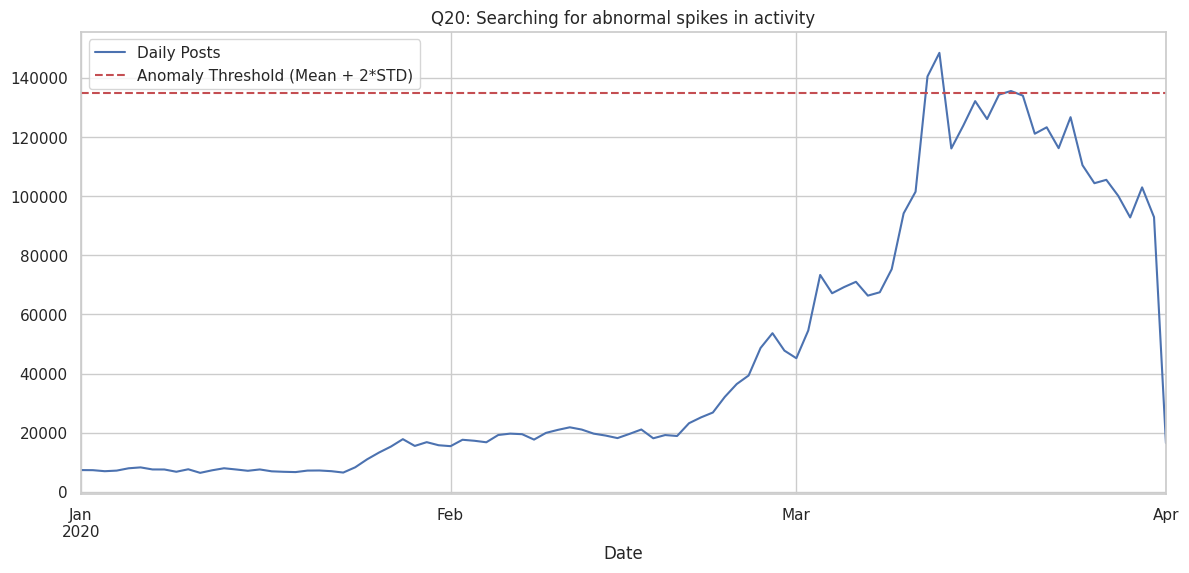

Dates with anomalous activity (it's worth checking the news on these days):
Date
2020-03-12    140521
2020-03-13    148513
2020-03-19    135608
dtype: int64


In [32]:
# Q20: Searching for anomalies by date (Spikes detection)
# Searching for specific days with abnormally high activity.
daily_counts = df.set_index('Date').resample('D').size()
mean_val = daily_counts.mean()
std_val = daily_counts.std()

plt.figure(figsize=(14, 6))
daily_counts.plot(label='Daily Posts')
# Drawing a "normality" line (Mean + 2 standard deviations)
plt.axhline(mean_val + 2*std_val, color='r', linestyle='--', label='Anomaly Threshold (Mean + 2*STD)')
plt.title('Q20: Searching for abnormal spikes in activity')
plt.legend()
plt.show()

# Print anomaly dates as text
anomalies = daily_counts[daily_counts > (mean_val + 2*std_val)]
print("Dates with anomalous activity (it's worth checking the news on these days):")
print(anomalies)